In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATA

In [29]:
df = pd.read_parquet('DATA/instacard_combined.parquet.gzip')
df.shape

MemoryError: Unable to allocate 2.02 GiB for an array with shape (8, 33894106) and data type int64

In [3]:
df.head(3)

,order_id,product_id,add_to_cart_order,reordered,source,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
index,,,,,,,,,,,,,,,,
0,2,33120,1,1,prior,202279,prior,3,5,9,8.0,Organic Egg Whites,86.0,16.0,eggs,dairy eggs
1,2,28985,2,1,prior,202279,prior,3,5,9,8.0,Michigan Organic Kale,83.0,4.0,fresh vegetables,produce
2,2,9327,3,0,prior,202279,prior,3,5,9,8.0,Garlic Powder,104.0,13.0,spices seasonings,pantry


In [4]:
df['source'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [5]:
df.describe().round(2)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
count,33894106.00,33894106.00,33894106.00,33894106.00,33894106.00,33894106.00,33894106.00,33894106.00,31816038.00,33819106.00,33819106.00
mean,1710564.34,25518.92,8.35,0.59,102944.54,17.14,2.74,13.43,11.38,71.22,9.92
std,987401.75,14133.28,7.15,0.50,59467.32,17.50,2.09,4.25,8.95,38.20,6.28
min,1.00,-1.00,-1.00,-1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00
25%,855413.00,13391.00,3.00,0.00,51435.00,5.00,1.00,10.00,5.00,31.00,4.00
50%,1710659.00,25157.00,6.00,1.00,102627.00,11.00,3.00,13.00,8.00,83.00,9.00
75%,2565583.00,37876.00,11.00,1.00,154411.00,24.00,5.00,16.00,15.00,107.00,16.00
max,3421083.00,49688.00,145.00,1.00,206209.00,100.00,6.00,23.00,30.00,134.00,21.00


# VISUAL EXPLORATION AND DATA UNDERSTANDING

In [9]:
col_list = ['order_id','product_id','add_to_cart_order','reordered','eval_set','order_number','order_dow','order_hour_of_day'
            , 'days_since_prior_order','aisle','department']

df_sample = df[col_list].query("eval_set!='test'").sample(n=100000)

In [10]:
df_sample.head(2)

,order_id,product_id,add_to_cart_order,reordered,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
index,,,,,,,,,,,
31676458,3340987,33198,4,1,prior,29,5,8,1.0,water seltzer sparkling water,beverages
29443006,3105264,199,1,0,prior,4,5,1,16.0,fresh herbs,produce


In [11]:
del df # release memory

In [12]:
df = df_sample

In [ ]:
sns.set(style="darkgrid") # set a grey background
sns.displot(df[["add_to_cart_order","order_number","days_since_prior_order"]], kde=True, bins=30)
plt.show()

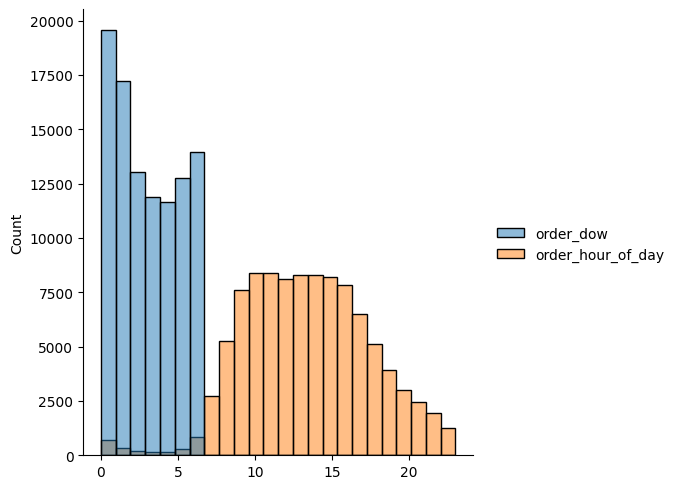

In [13]:
sns.displot(df[["order_dow","order_hour_of_day"]], bins=24)
plt.show()

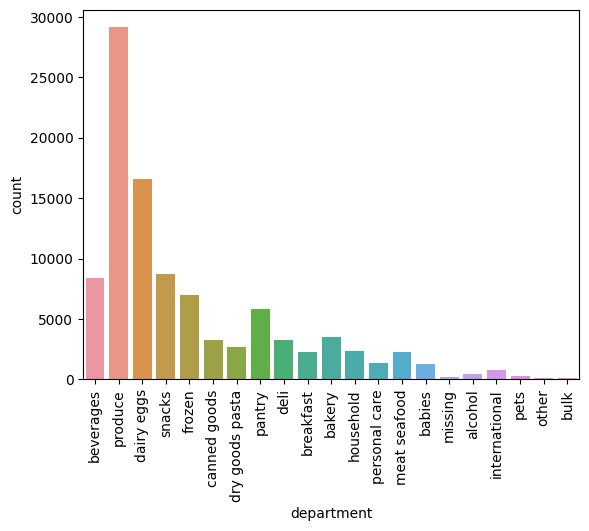

In [15]:
# Plot countplot
sns.countplot(x="department", data=df) 
plt.xticks(rotation = 90)
plt.show()

# ONE CLIENT CHECKING

In [ ]:
#df_userid = df.query("user_id==203")
df_userid = df.query("user_id==17")
df_userid.head(2)

In [ ]:
df_userid.to_csv('DATA/user_id_17.csv')

In [ ]:
df_userid.agg({"reordered": np.sum, "order_id": pd.Series.nunique})

In [ ]:
df_userid.sort_values(['order_number','add_to_cart_order']).style.background_gradient(subset=["order_id", "product_id", "reordered"])

# CLIENT BASED EXPLORATION

In [8]:
df_cli_sample = df.query("eval_set!='test' & user_id  % 100 == 0")

df_cli_sample.shape

(344032, 16)

In [17]:
del df # release memory

In [18]:
df = df_cli_sample

In [19]:
df.head(3)

,order_id,product_id,add_to_cart_order,reordered,source,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
index,,,,,,,,,,,,,,,,
1337,144,45437,1,1,prior,179300,prior,4,3,15,30.0,Sea Salt Made With Organic Grain Rice Chips,107.0,19.0,chips pretzels,snacks
1338,144,35921,2,1,prior,179300,prior,4,3,15,30.0,Organic Large Grade A Brown Eggs,86.0,16.0,eggs,dairy eggs
1339,144,43394,3,1,prior,179300,prior,4,3,15,30.0,Organic Lactose Free Whole Milk,91.0,16.0,soy lactosefree,dairy eggs


In [20]:
stats = [pd.Series.nunique, 'mean', 'median', 'min', 'max', 'std']
id_attrs = ['order_id', 'product_id', 'aisle_id', 'department_id']
feat_attrs = ['add_to_cart_order', 'reordered', 'order_number', 'days_since_prior_order']


aggs = dict.fromkeys(id_attrs, stats[0])
aggs_feat = dict.fromkeys(feat_attrs, stats)

aggs.update(aggs_feat)

aggs

df_cli = df.query("eval_set!='test'").groupby('user_id').agg(aggs).round(2) # calculate stats on client lvl

df_cli.columns = ['__'.join(col).strip() for col in df_cli.columns.values] # remove multiindex
df_cli.head(3)

,order_id__nunique,product_id__nunique,aisle_id__nunique,department_id__nunique,add_to_cart_order__nunique,add_to_cart_order__mean,add_to_cart_order__median,add_to_cart_order__min,add_to_cart_order__max,add_to_cart_order__std,...,order_number__median,order_number__min,order_number__max,order_number__std,days_since_prior_order__nunique,days_since_prior_order__mean,days_since_prior_order__median,days_since_prior_order__min,days_since_prior_order__max,days_since_prior_order__std
user_id,,,,,,,,,,,,,,,,,,,,,
100,5,20,16,7,8,3.70,3.0,1,8,2.22,...,4.0,1,5,1.31,3,26.32,26.0,18.0,30.0,4.61
200,9,88,36,13,35,12.75,10.5,1,35,8.98,...,5.0,1,9,2.07,5,21.78,21.0,6.0,30.0,8.54
300,39,169,39,13,89,16.79,6.0,1,89,23.51,...,11.0,1,39,14.13,14,6.60,4.0,0.0,30.0,7.03


df_cli.head(1).T

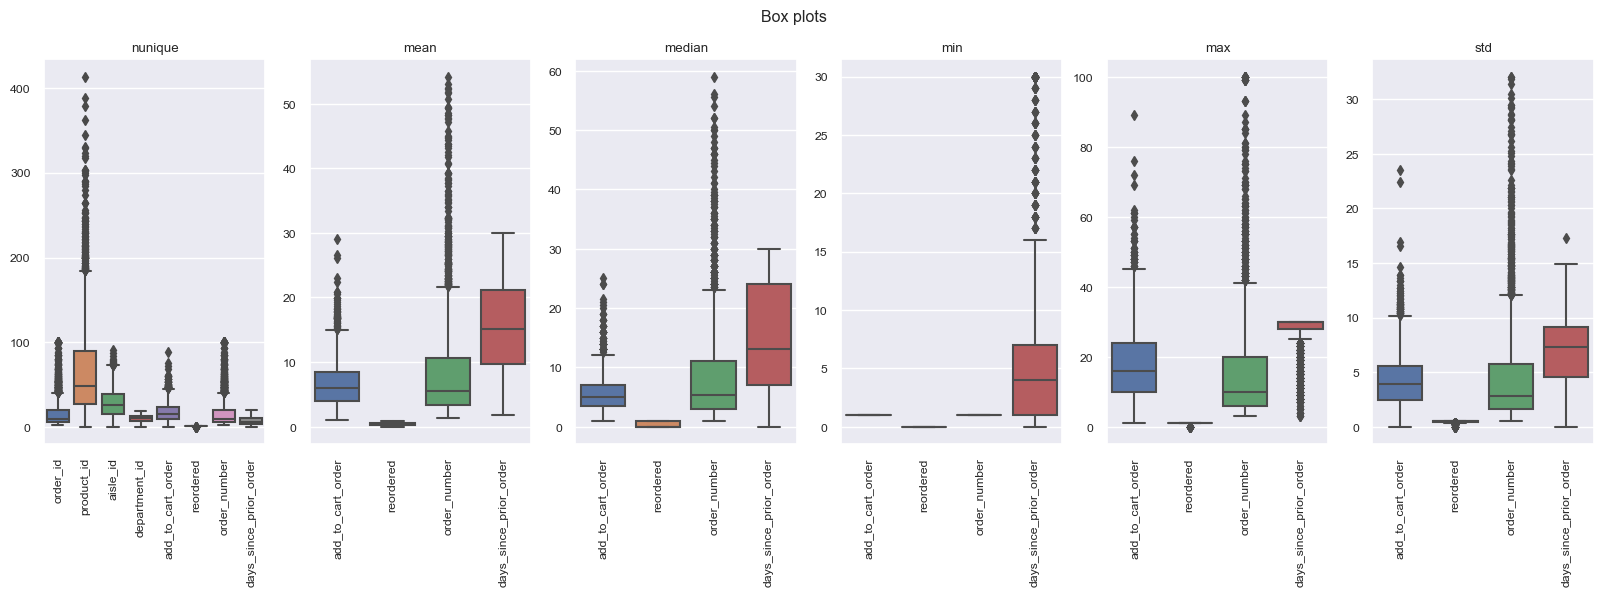

In [27]:
# box plot
stats[0] = 'nunique' # column name

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
fig.suptitle('Box plots')

for i, value in enumerate(stats):

    #print(value)
    col_sub = [x for x in df_cli.columns if x.find(value) > 0]
    col_sub_short = [item[:item.find('__')] for item in col_sub]
    
    
    sns.boxplot(ax=axes[i], data=df_cli[col_sub])
    
    axes[i].set_title(value)
    axes[i].set_xticks(range(len(col_sub)))
    axes[i].set_xticklabels(labels=col_sub_short, rotation=90)
    

plt.show()

<Axes: >

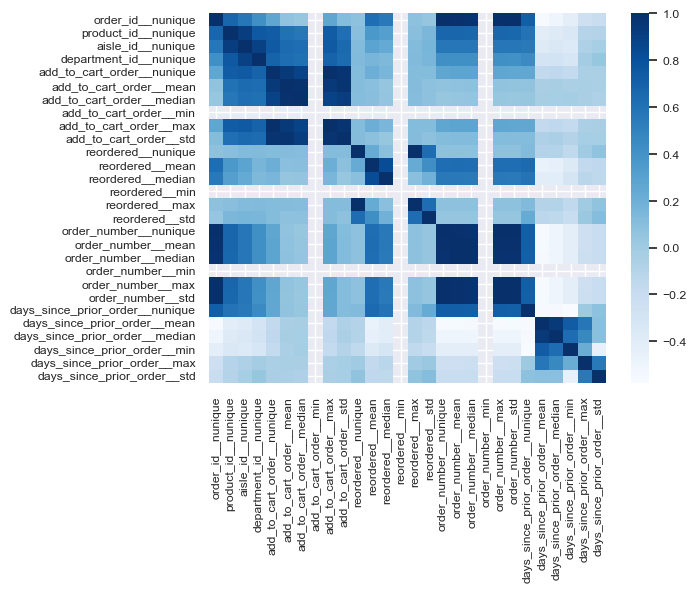

In [23]:
# Correlation map
col_sub = [x for x in df_cli.columns if x.find('nunique') > 0]

sns.set(font_scale=0.8)
sns.heatmap(df_cli.corr(), annot = False, cmap = 'Blues')

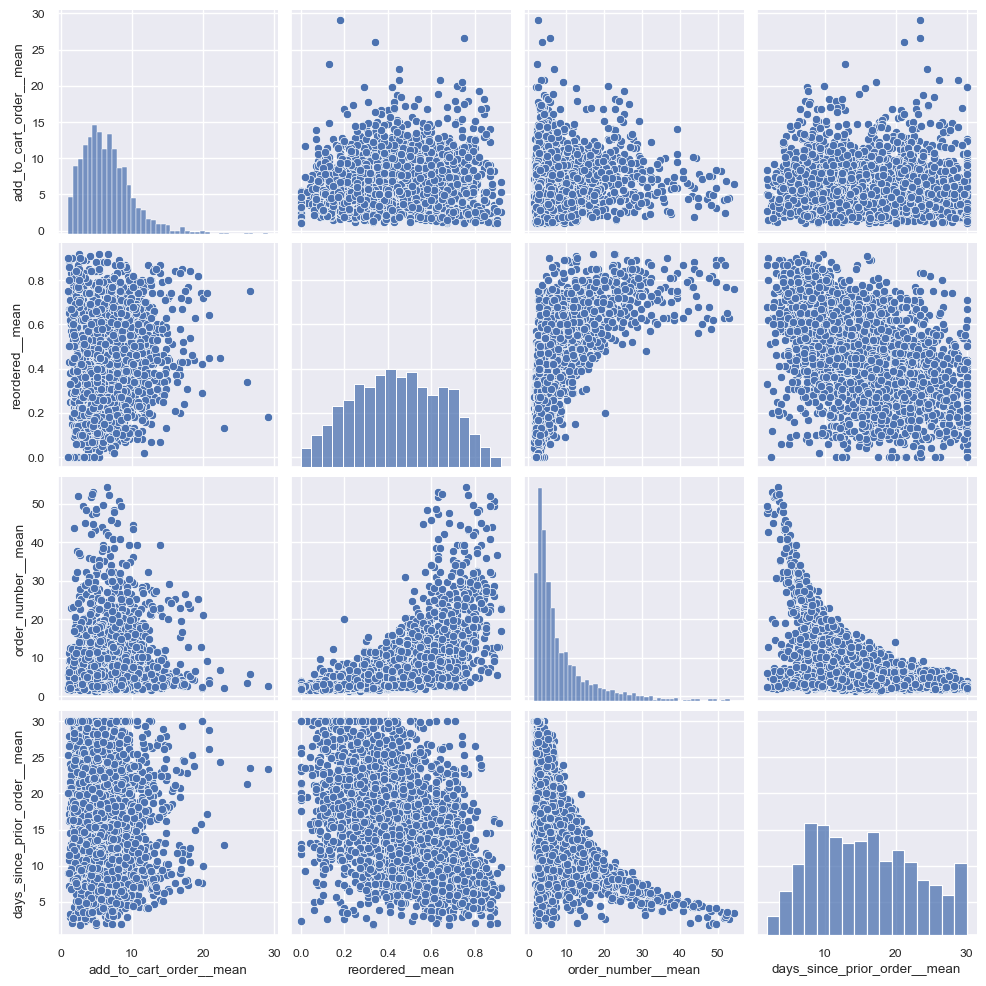

In [24]:
# Pair plots
col_sub = [x for x in df_cli.columns if x.find('mean') > 0]

sns.pairplot(df_cli[col_sub])